<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [6]:
import wget

In [7]:
wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite')

'm4_survey_data (1).sqlite'

Connect to the database.


In [8]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [10]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [11]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [12]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [13]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<Axes: ylabel='Frequency'>

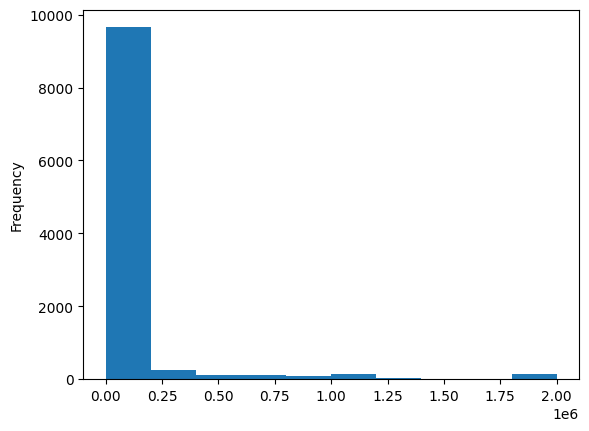

In [14]:
# your code goes here
QUERY = """
SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY,conn, index_col='index')
df['ConvertedComp'].plot(kind='hist')

### Box Plots


Plot a box plot of `Age.`


<Axes: >

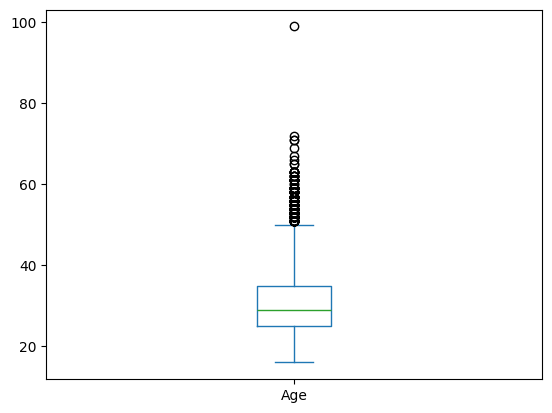

In [15]:
# your code goes here
df['Age'].plot(kind='box')


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


Text(0, 0.5, 'Age')

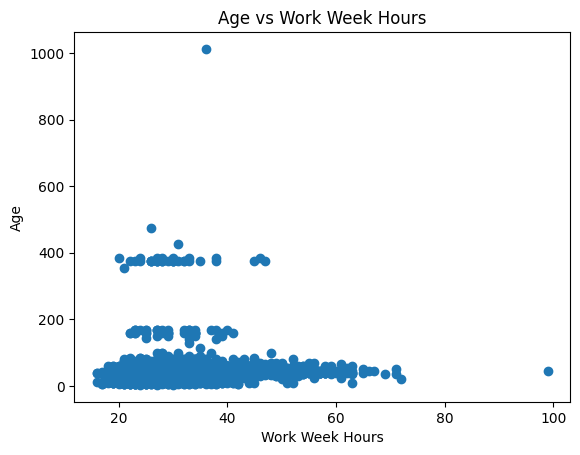

In [16]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df_age_hrs = pd.read_sql_query(QUERY,conn)
plt.scatter(data=df_age_hrs, x='Age', y='WorkWeekHrs')
plt.title("Age vs Work Week Hours")
plt.xlabel('Work Week Hours')
plt.ylabel('Age')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


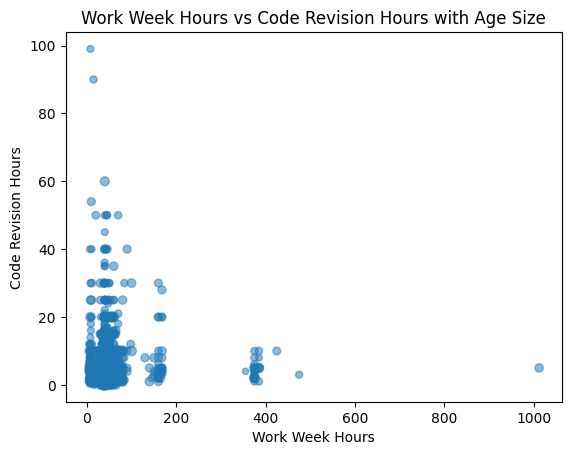

In [17]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df_age_hrs_crev = pd.read_sql_query(QUERY,conn)
plt.scatter(data=df_age_hrs_crev, x='WorkWeekHrs', y='CodeRevHrs', s='Age', alpha=0.5)
plt.title("Work Week Hours vs Code Revision Hours with Age Size")
plt.xlabel('Work Week Hours')
plt.ylabel('Code Revision Hours')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


  DatabaseDesireNextYear  Count
0             PostgreSQL   4328
1                MongoDB   3649
2                  Redis   3331
3                  MySQL   3281
4          Elasticsearch   2856


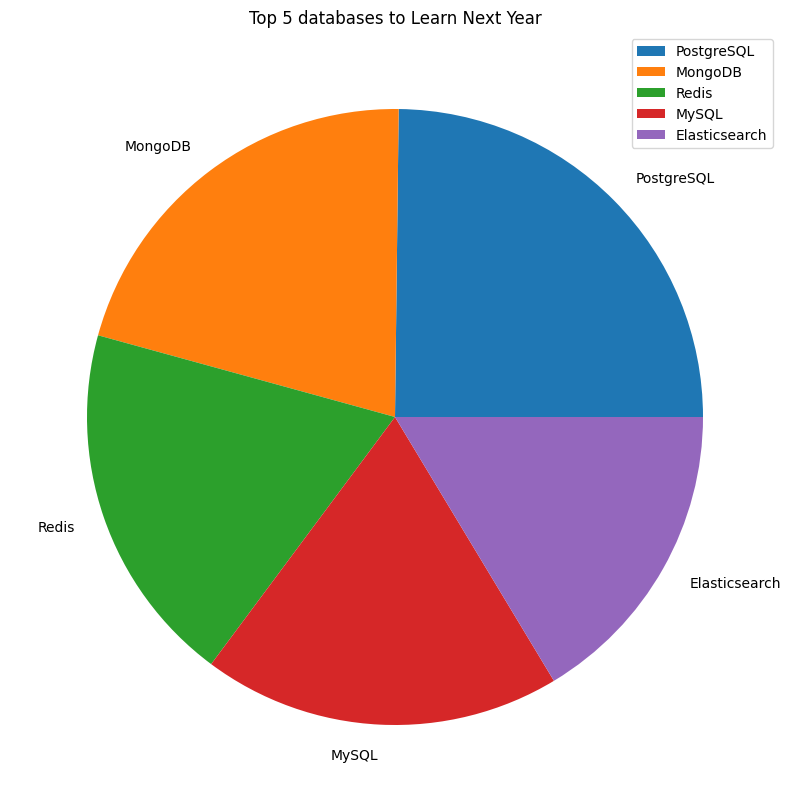

In [18]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df_db = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10, 10))
plt.pie(data=df_db, x='Count' , labels='DatabaseDesireNextYear')
plt.title("Top 5 databases to Learn Next Year")
plt.legend(df_db['DatabaseDesireNextYear'])

print(df_db)

In [19]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df_lang = pd.read_sql_query(QUERY,conn)
df_lang


,LanguageDesireNextYear,Count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [20]:
QUERY = """
SELECT LanguageWorkedWith, COUNT(*) as Count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY Count DESC
"""
df_lang_work = pd.read_sql_query(QUERY,conn)
df_lang_work


,LanguageWorkedWith,Count
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [21]:
QUERY = """
SELECT *
FROM (SELECT Respondent, DatabaseWorkedWith FROM DatabaseWorkedWith WHERE DatabaseWorkedWith = 'MySQL')
"""
df_fulldb = pd.read_sql_query(QUERY,conn)
df_fulldb

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,13,MySQL
2,16,MySQL
3,19,MySQL
4,22,MySQL
...,...,...
5464,25111,MySQL
5465,25120,MySQL
5466,25124,MySQL
5467,25134,MySQL


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.

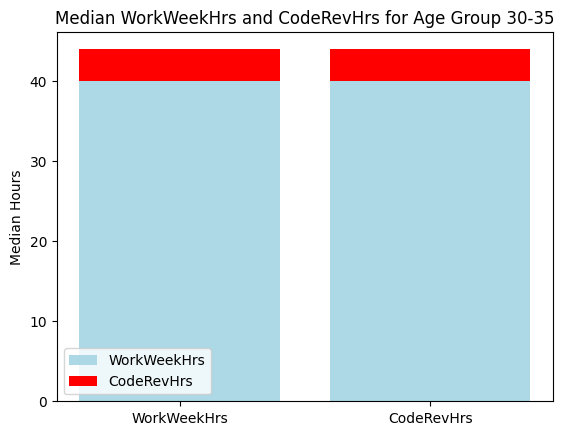

In [22]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age > 29 AND Age < 36
"""
df_work_code_age = pd.read_sql_query(QUERY,conn)

# Calculate median values for WorkWeekHrs and CodeRevHrs
median_values = df_work_code_age[['WorkWeekHrs', 'CodeRevHrs']].median()

# Create a stacked bar chart
fig, ax = plt.subplots()

ax.bar(median_values.index, median_values['WorkWeekHrs'], label='WorkWeekHrs', color='lightblue')
ax.bar(median_values.index, median_values['CodeRevHrs'], label='CodeRevHrs', color='red', bottom=median_values['WorkWeekHrs'])

# Adding labels and title
ax.set_ylabel('Median Hours')
ax.set_title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
ax.legend()

plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.

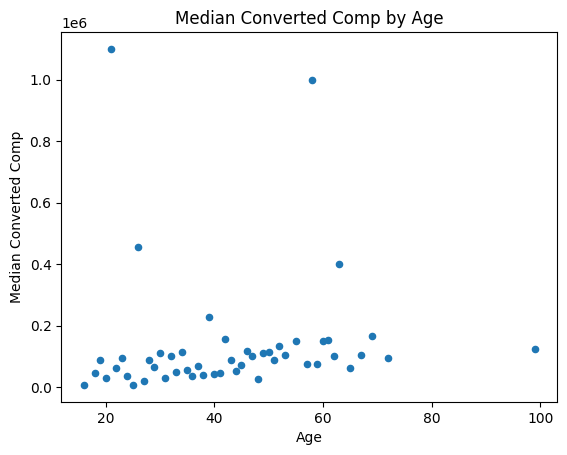

In [23]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
GROUP BY Age
"""
df_comp_age = pd.read_sql_query(QUERY,conn)
df_median = df_comp_age.groupby('Age')['ConvertedComp'].median().reset_index()

df_median.plot(x='Age', y='ConvertedComp', kind='scatter', title="Median Converted Comp by Age")
plt.xlabel("Age")
plt.ylabel("Median Converted Comp")
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`

In [24]:
# your code goes here
QUERY = """
SELECT DevType, Count(*) As Count
FROM DevType
GROUP BY DevType
ORDER BY Count DESC
"""
df_branch = pd.read_sql_query(QUERY,conn)
df_branch.head()


,DevType,Count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


<Axes: ylabel='DevType'>

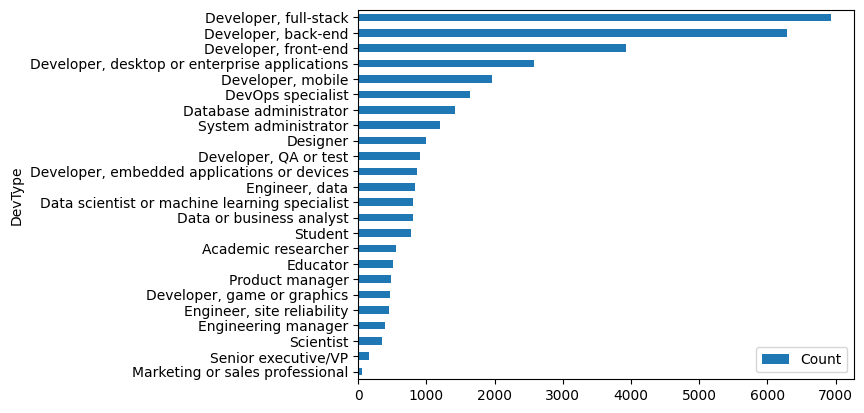

In [35]:
df_branch.sort_values("Count").plot(kind='barh', x='DevType', y='Count')

Close the database connection.


In [34]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
